# Audio Feature Extraction Using Librosa
This Jupyter Notebook loads an audio file and extracts various rhythm-related features, visualizes beats, performs time-frequency analysis, and estimates pitch.

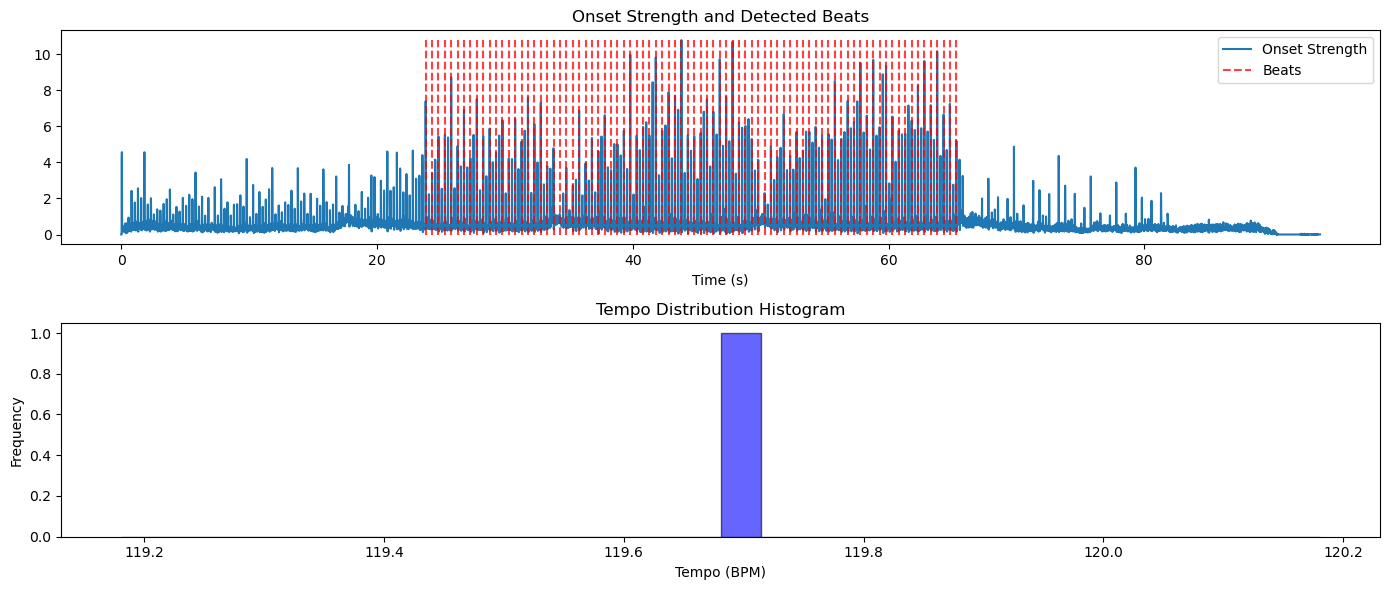

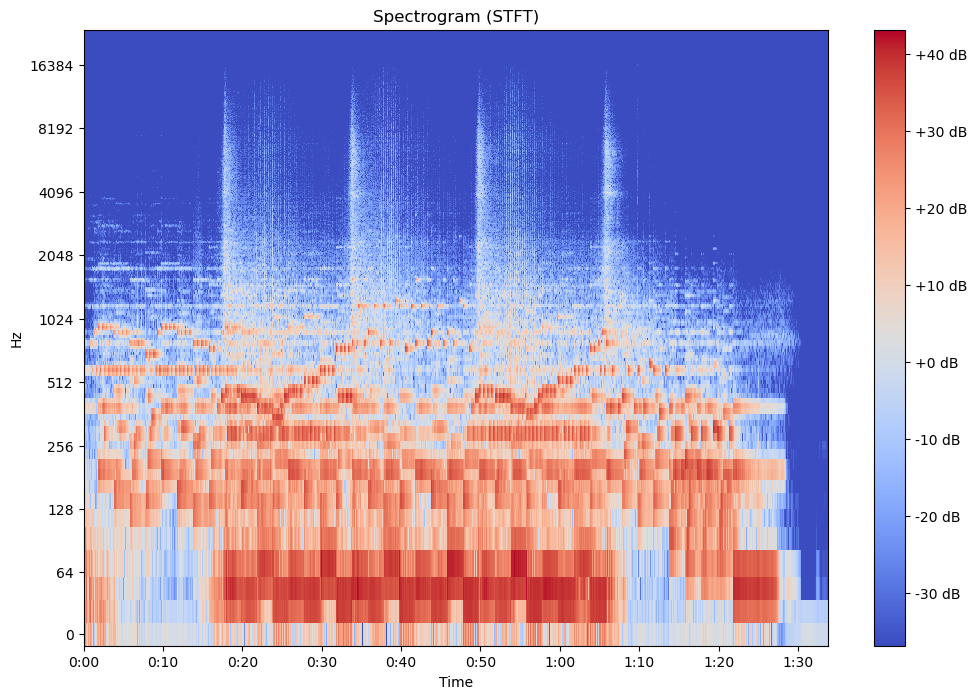

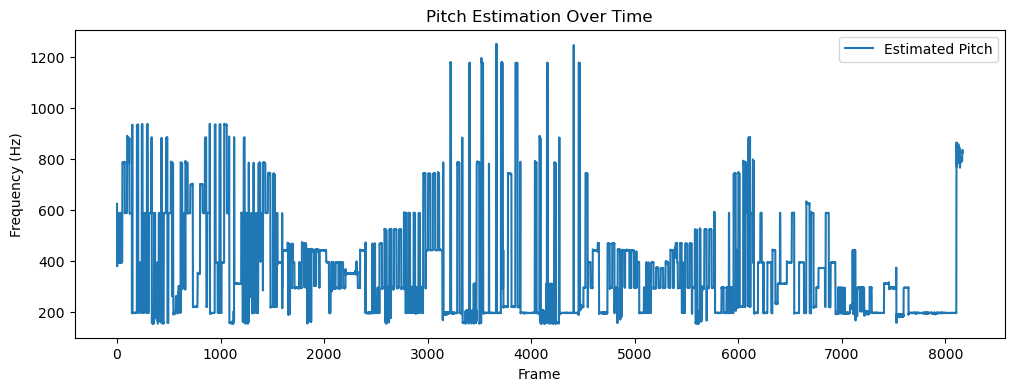

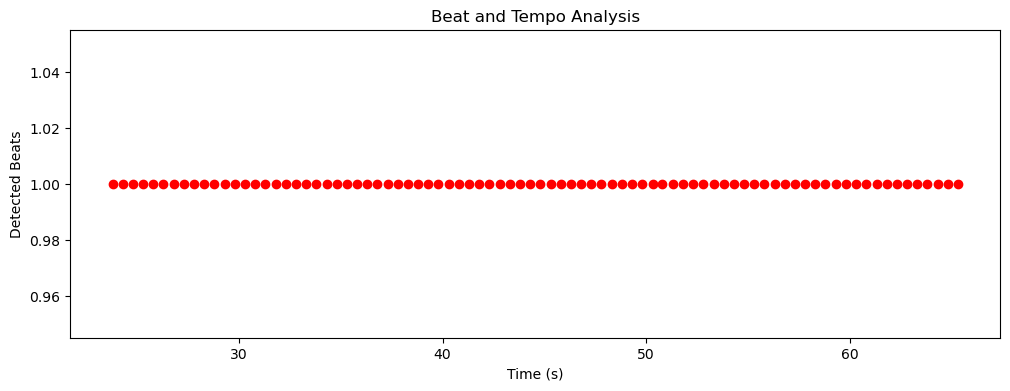

{'file_name': 'lost-story-250928.mp3', 'estimated_tempo': 119.68085106382979, 'beat_frames': [2231, 2278, 2325, 2372, 2418, 2465, 2512, 2559, 2606, 2653, 2700, 2747, 2794, 2840, 2887, 2934, 2981, 3028, 3075, 3122, 3169, 3216, 3262, 3309, 3356, 3403, 3450, 3497, 3544, 3590, 3637, 3684, 3731, 3778, 3825, 3871, 3918, 3965, 4012, 4059, 4106, 4153, 4200, 4247, 4294, 4340, 4387, 4434, 4481, 4528, 4575, 4622, 4669, 4716, 4762, 4809, 4856, 4903, 4950, 4997, 5044, 5090, 5137, 5184, 5231, 5278, 5325, 5372, 5418, 5465, 5512, 5559, 5606, 5653, 5700, 5747, 5794, 5840, 5887, 5934, 5981, 6028, 6075, 6122], 'mean_onset_strength': 0.6134210228919983}


In [13]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

# Define the audio path
audio_file_path = r'C:\Users\danda\Python projects\Audio Feature Extraction Final\audio files\lost-story-250928.mp3'

def load_audio_file(audio_path):
    """Load an audio file and return the audio data and sample rate."""
    audio_data, sample_rate = librosa.load(audio_path, sr=None)  # Load with original sampling rate
    return audio_data, sample_rate

def extract_rhythm_related_features(audio_data, sample_rate):
    """Extract rhythm-related features such as tempo, beat frames, and onset strength."""
    estimated_tempo, beat_frames = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
    onset_strength = librosa.onset.onset_strength(y=audio_data, sr=sample_rate)
    return estimated_tempo, beat_frames, onset_strength

def visualize_rhythm_related_features(audio_data, sample_rate, estimated_tempo, beat_frames, onset_strength):
    """Visualize onset strength and detected beats."""
    plt.figure(figsize=(14, 6))
    time_indices = librosa.times_like(onset_strength, sr=sample_rate)
    
    plt.subplot(2, 1, 1)
    plt.plot(time_indices, onset_strength, label='Onset Strength')
    plt.vlines(librosa.frames_to_time(beat_frames, sr=sample_rate), 0, onset_strength.max(), color='r', alpha=0.75, linestyle='--', label='Beats')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.title('Onset Strength and Detected Beats')
    
    plt.subplot(2, 1, 2)
    plt.hist(estimated_tempo, bins=30, alpha=0.6, color='b', edgecolor='k')
    plt.xlabel('Tempo (BPM)')
    plt.ylabel('Frequency')
    plt.title('Tempo Distribution Histogram')
    
    plt.tight_layout()
    plt.show()

def perform_time_frequency_analysis(audio_data, sample_rate):
    """Perform a time-frequency analysis using the Short-Time Fourier Transform (STFT)."""
    stft_result = librosa.stft(audio_data)
    stft_db = librosa.amplitude_to_db(abs(stft_result))
    
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(stft_db, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (STFT)')
    plt.show()

def estimate_audio_pitch(audio_data, sample_rate):
    """Estimate the pitch of the audio signal over time."""
    pitch_values, magnitudes = librosa.piptrack(y=audio_data, sr=sample_rate)
    pitch_estimates = []
    for time_index in range(pitch_values.shape[1]):
        index = magnitudes[:, time_index].argmax()
        pitch_estimates.append(pitch_values[index, time_index])
    
    pitch_estimates = np.array(pitch_estimates)
    pitch_estimates = pitch_estimates[pitch_estimates > 0]
    
    plt.figure(figsize=(12, 4))
    plt.plot(pitch_estimates, label='Estimated Pitch')
    plt.xlabel('Frame')
    plt.ylabel('Frequency (Hz)')
    plt.title('Pitch Estimation Over Time')
    plt.legend()
    plt.show()

def analyze_beat_and_tempo(audio_data, sample_rate):
    """Analyze and visualize detected beats and estimated tempo."""
    estimated_tempo, detected_beats = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
    
    plt.figure(figsize=(12, 4))
    time_indices = librosa.frames_to_time(detected_beats, sr=sample_rate)
    plt.plot(time_indices, np.ones_like(time_indices), 'ro')
    plt.xlabel('Time (s)')
    plt.ylabel('Detected Beats')
    plt.title('Beat and Tempo Analysis')
    plt.show()
    
    return float(estimated_tempo[0]) if isinstance(estimated_tempo, np.ndarray) else float(estimated_tempo)

def execute_feature_extraction(audio_path):
    """Execute the entire audio feature extraction pipeline."""
    audio_data, sample_rate = load_audio_file(audio_path)
    estimated_tempo, beat_frames, onset_strength = extract_rhythm_related_features(audio_data, sample_rate)
    visualize_rhythm_related_features(audio_data, sample_rate, estimated_tempo, beat_frames, onset_strength)
    perform_time_frequency_analysis(audio_data, sample_rate)
    estimate_audio_pitch(audio_data, sample_rate)
    tempo_value = analyze_beat_and_tempo(audio_data, sample_rate)
    
    feature_vector = {
        "file_name": os.path.basename(audio_path),
        "estimated_tempo": tempo_value,
        "beat_frames": beat_frames.tolist(),
        "mean_onset_strength": float(np.mean(onset_strength))
    }
    
    return feature_vector

# Execute feature extraction
features = execute_feature_extraction(audio_file_path)
print(features)
